## Setup

In [1]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.datasets import mnist

## Prepare the data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
train_images.shape

(60000, 784)

In [9]:
test_images.shape

(10000, 784)

## Build the model

In [10]:
model = Sequential([
    Dense(512, activation = "relu", input_shape = (28 * 28,)),
    Dense(10, activation = "softmax")
])

## Compile the model

In [11]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

## Train the model (option 1)

In [ ]:
#model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

## Train the model (with loss and accuracy visualization)

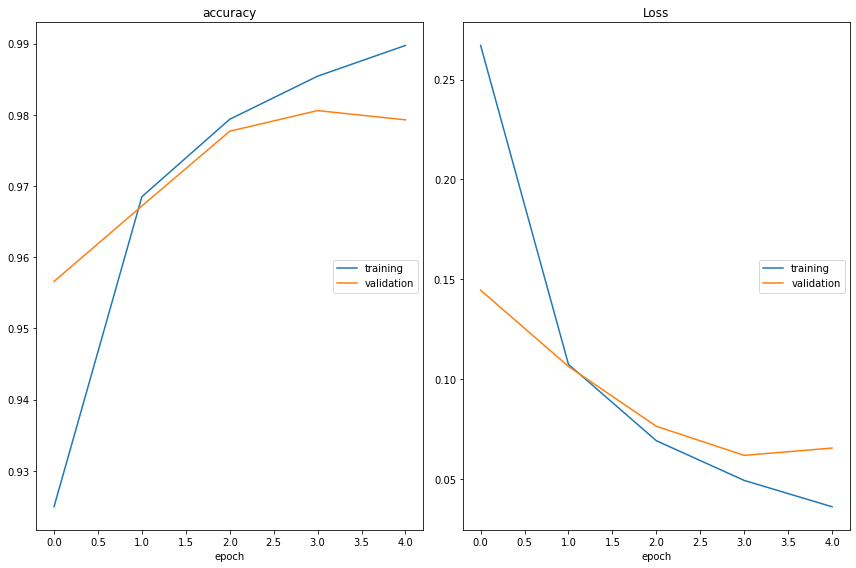

accuracy
	training         	 (min:    0.925, max:    0.990, cur:    0.990)
	validation       	 (min:    0.957, max:    0.981, cur:    0.979)
Loss
	training         	 (min:    0.036, max:    0.267, cur:    0.036)
	validation       	 (min:    0.062, max:    0.145, cur:    0.066)
469/469 [==============================] - 7s 14ms/step - loss: 0.0363 - accuracy: 0.9898 - val_loss: 0.0657 - val_accuracy: 0.9793


In [12]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

model.fit(train_images, train_labels, 
          epochs = 5, 
          batch_size = 128, 
          callbacks = [plot_losses], 
          validation_data = (test_images, test_labels))

## Evaluate the trained model

In [13]:
score = model.evaluate(test_images, test_labels, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06566901504993439
Test accuracy: 0.9793000221252441


## Model summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
